# Évolution des sondages pour la présidentielle française de 2022

In [6]:
import pandas as pd
import datetime
z=pd.read_csv("https://github.com/nsppolls/nsppolls/raw/master/presidentielle.csv")

liste_retenue=['Anne Hidalgo', 'Emmanuel Macron','Eric Zemmour', 'Fabien Roussel', 'Jean Lassalle','Jean-Luc Mélenchon', 'Marine Le Pen','Nathalie Arthaud', 'Nicolas Dupont-Aignan', 'Philippe Poutou', 'Valérie Pécresse', 'Yannick Jadot']

z=z[z.id!='20220410_0410_elb'] # contient un bug

z["date"]=pd.to_datetime(z.fin_enquete)

In [2]:
# Resultats finaux premier tour
date_scrutin_1=datetime.datetime(2022,4,10)

# source : https://www.resultats-elections.interieur.gouv.fr/presidentielle-2022/FE.html
premier_tour={'Emmanuel Macron':      27.84,
              'Marine Le Pen':        23.15,
              'Jean-Luc Mélenchon':   21.95,
              'Eric Zemmour':          7.07,
              'Valérie Pécresse':      4.78,
              'Yannick Jadot':         4.63,
              'Jean Lassalle':         3.13,
              'Fabien Roussel':        2.28,
              'Nicolas Dupont-Aignan': 2.06,
              'Anne Hidalgo':          1.75, 
              'Philippe Poutou':       0.77,
              'Nathalie Arthaud':      0.56,
             }
              
res1=pd.DataFrame()
for k,v in premier_tour.items():
    res1=res1.append(pd.DataFrame([{'candidat':k,'tour':'Premier tour','erreur_sup':v,'erreur_inf':v,'intentions':v,'date':date_scrutin_1}]))

Text(0.5, 1.0, 'Sondage pour le 1er tour, présidentielle 2022')

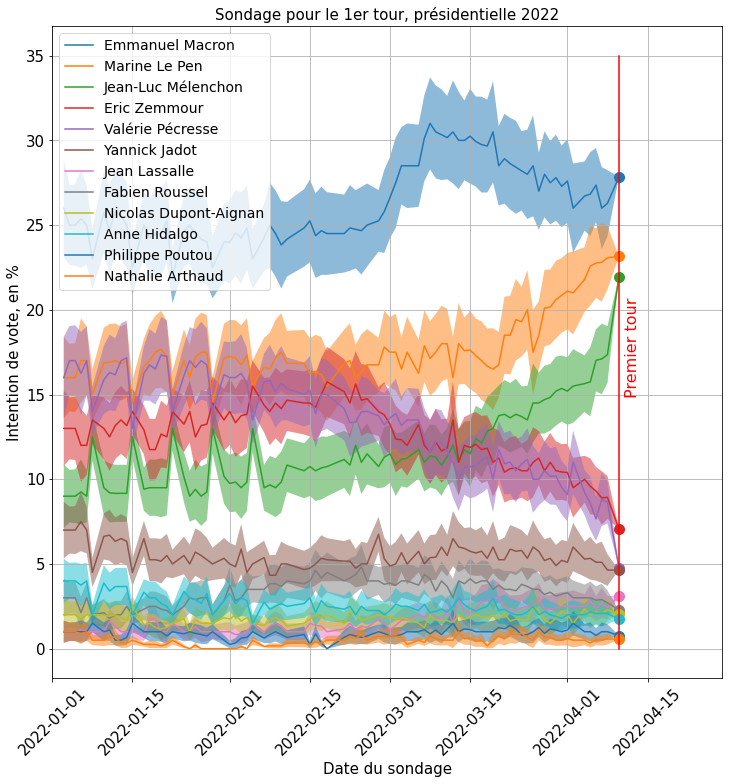

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)    
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(12,12))
plt.xticks(rotation=45)

z=z.append(res1)

z1=z[(z.tour=="Premier tour") & (z.candidat.isin(liste_retenue))][["date","candidat","intentions","erreur_inf","erreur_sup"]]
z1=pd.pivot_table(z1, index=['date'], columns='candidat', values=["intentions","erreur_inf","erreur_sup"]) # mise en forme
z1=z1.reset_index()
z1=z1[z1.date>datetime.datetime(2022,1,1)].set_index("date")

#z1['tot']=z1.sum(axis=1)
# renormalisation pour les seuls retenus
#for c in z1.columns:
#    if c=='tot':
#        continue
#    z1[c]=z1[c]/z1.tot*100

liste_ordonnee=list(z1[z1.index==z1.index.max()].intentions.transpose().sort_values(by=z1.index.max(),ascending=False).index)

for qui in liste_ordonnee:
    val=z1.loc[:,('intentions',qui)]
    vmin=z1.loc[:,('erreur_inf',qui)]
    vmax=z1.loc[:,('erreur_sup',qui)]
    ax.plot(z1.index,val,label=qui)
    ax.plot(z1.index[-1],val[-1], marker=".", markersize=20,color=plt.gca().lines[-1].get_color())
    ax.fill_between(z1.index, vmin,vmax,alpha=0.5)#, where=None, interpolate=False, step=None, *, data=None, 
    
ax.legend(loc='upper left')
ax.set_xlim(datetime.datetime(2022,1,1),datetime.datetime(2022,4,28))
#maxn2=z2[z1.columns[0]].max()
#minn2=z2[z1.columns[0]].min()
ax.plot([date_scrutin_1,date_scrutin_1],[0,35],'r-')
ax.text(date_scrutin_1+datetime.timedelta(days=1),15,'Premier tour',rotation='vertical',color='red',fontsize=16)

ax.grid()
ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')

ax.set_title('Sondage pour le 1er tour, présidentielle 2022')

Text(0.5, 1.0, 'Sondage pour le 2nd tour, présidentielle 2022')

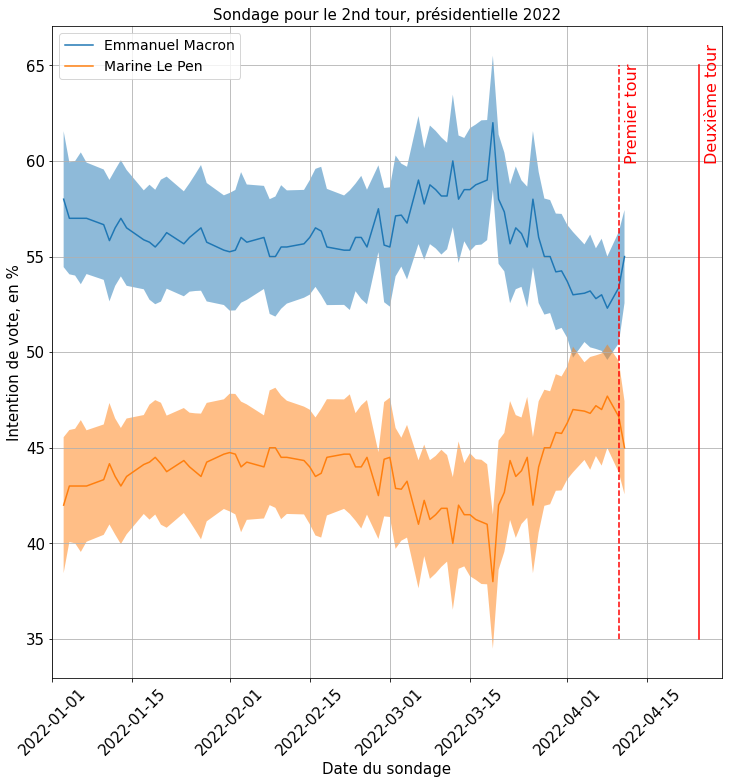

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)    
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(12,12))
plt.xticks(rotation=45)

z2=z[(z.tour=="Deuxième tour") & ( (z.hypothese=='Hypothèse Macron / Le Pen') | (z.hypothese.isnull() ) )][["date","candidat","intentions","erreur_inf","erreur_sup"]]
z2=pd.pivot_table(z2, index=['date'], columns='candidat', values=['intentions','erreur_inf','erreur_sup']).reset_index()
z2=z2[z2.date>datetime.datetime(2022,1,1)].set_index("date")

for qui in ['Emmanuel Macron','Marine Le Pen']:
    val=z2.loc[:,('intentions',qui)]
    vmin=z2.loc[:,('erreur_inf',qui)]
    vmax=z2.loc[:,('erreur_sup',qui)]
    ax.plot(z2.index,val,label=qui)
    ax.fill_between(z2.index, vmin,vmax,alpha=0.5)#, where=None, interpolate=False, step=None, *, data=None, 
    
ax.legend(loc='upper left')
ax.set_xlim(datetime.datetime(2022,1,1),datetime.datetime(2022,4,28))
date_scrutin_2=datetime.datetime(2022,4,24)
maxn2=z2[z2.columns[0]].max()
minn2=z2[z2.columns[0]].min()
ax.plot([date_scrutin_2,date_scrutin_2],[35,65],'r-')
ax.text(date_scrutin_2+datetime.timedelta(days=1),60,'Deuxième tour',rotation='vertical',color='red',fontsize=16)

ax.plot([date_scrutin_1,date_scrutin_1],[35,65],'r--')
ax.text(date_scrutin_1+datetime.timedelta(days=1),60,'Premier tour',rotation='vertical',color='red',fontsize=16)

ax.grid()
ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')
ax.set_title('Sondage pour le 2nd tour, présidentielle 2022')

Text(0.5, 1.0, 'Sondage pour le 2nd tour, présidentielle 2022')

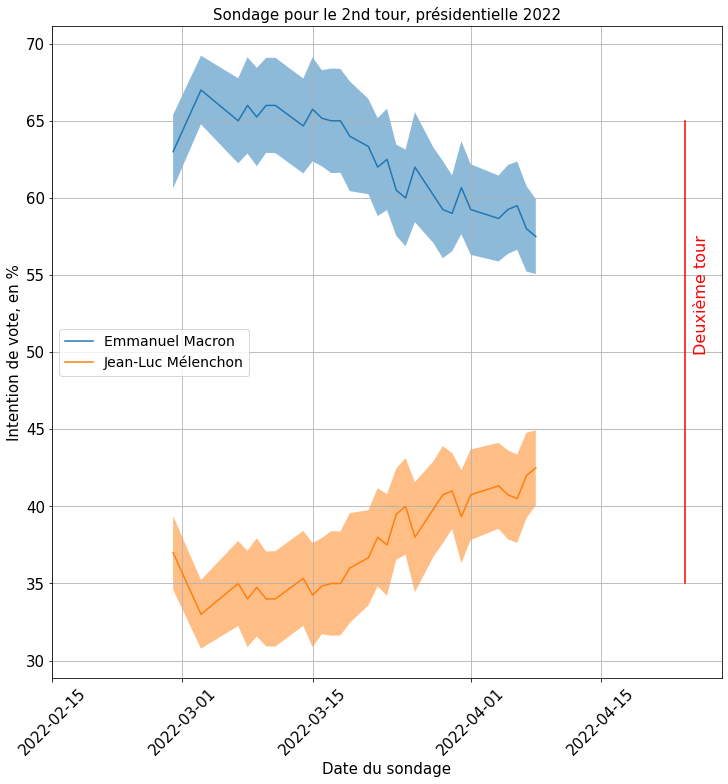

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)    
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(12,12))
plt.xticks(rotation=45)

z3=z[(z.tour=="Deuxième tour") & (z.hypothese=='Hypothèse Macron / Mélenchon')][["date","candidat","intentions","erreur_inf","erreur_sup"]]
z3=pd.pivot_table(z3, index=['date'], columns='candidat', values=['intentions','erreur_inf','erreur_sup']).reset_index()
z3=z3[z3.date>datetime.datetime(2022,1,1)].set_index("date")

for qui in ['Emmanuel Macron','Jean-Luc Mélenchon']:
    val=z3.loc[:,('intentions',qui)]
    vmin=z3.loc[:,('erreur_inf',qui)]
    vmax=z3.loc[:,('erreur_sup',qui)]
    ax.plot(z3.index,val,label=qui)
    ax.fill_between(z3.index, vmin,vmax,alpha=0.5)#, where=None, interpolate=False, step=None, *, data=None, 
    
ax.legend(loc='center left')
ax.set_xlim(datetime.datetime(2022,2,15),datetime.datetime(2022,4,28))
date_scrutin_2=datetime.datetime(2022,4,24)
maxn2=z3[z3.columns[0]].max()
minn2=z3[z3.columns[0]].min()
ax.plot([date_scrutin_2,date_scrutin_2],[35,65],'r-')
ax.text(date_scrutin_2+datetime.timedelta(days=1),50,'Deuxième tour',rotation='vertical',color='red',fontsize=16)

ax.grid()
ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')

ax.set_title('Sondage pour le 2nd tour, présidentielle 2022')